In [34]:
import pandas as pd
import numpy as np
import missingno as msno

In [9]:
train_tx = pd.read_csv("../data/raw/train_transaction.csv")
print(train_tx.shape)
train_id = pd.read_csv("../data/raw/train_identity.csv")
print(train_id.shape)

(590540, 394)
(144233, 41)


In [14]:
print(f"Fraud Percentage: {train_tx['isFraud'].mean():.2%}")

Fraud Percentage: 3.50%


In [23]:
merged = train_tx.merge(train_id, on='TransactionID', how='left', indicator=True)
merged.head(5)

C:\Users\krish\AppData\Local\Temp\ipykernel_36724\2496151463.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged = train_tx.merge(train_id, on='TransactionID', how='left', indicator=True)
C:\Users\krish\AppData\Local\Temp\ipykernel_36724\2496151463.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged = train_tx.merge(train_id, on='TransactionID', how='left', indicator=True)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,_merge
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,both


In [44]:
print(f"Transactions with identity: {(merged['_merge']=='both').sum()}")
print(f"Identity coverage: {(merged['_merge']=='both').mean():.3f}")

Transactions with identity: 144233
Identity coverage: 0.244


In [42]:
entity_cols = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2', 'dist1', 'dist2']
for col in entity_cols:
    print(f"{col}: {train_tx[col].nunique()} unique values")
    print(f"Missing: {train_tx[col].isna().mean():.1%}")

ProductCD: 5 unique values
Missing: 0.0%
card1: 13553 unique values
Missing: 0.0%
card2: 500 unique values
Missing: 1.5%
card3: 114 unique values
Missing: 0.3%
card4: 4 unique values
Missing: 0.3%
card5: 119 unique values
Missing: 0.7%
card6: 4 unique values
Missing: 0.3%
P_emaildomain: 59 unique values
Missing: 16.0%
R_emaildomain: 60 unique values
Missing: 76.8%
addr1: 332 unique values
Missing: 11.1%
addr2: 74 unique values
Missing: 11.1%
dist1: 2651 unique values
Missing: 59.7%
dist2: 1751 unique values
Missing: 93.6%


In [29]:
train_tx['TransactionDT'].describe()

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

In [47]:
(train_tx.groupby(pd.cut(train_tx['TransactionDT'], bins=10))['isFraud'].mean())

TransactionDT
(70675.269, 1658873.1]      0.026834
(1658873.1, 3231346.2]      0.026890
(3231346.2, 4803819.3]      0.040192
(4803819.3, 6376292.4]      0.044371
(6376292.4, 7948765.5]      0.037787
(7948765.5, 9521238.6]      0.034966
(9521238.6, 11093711.7]     0.041057
(11093711.7, 12666184.8]    0.036356
(12666184.8, 14238657.9]    0.030628
(14238657.9, 15811131.0]    0.037696
Name: isFraud, dtype: float64

<Axes: >

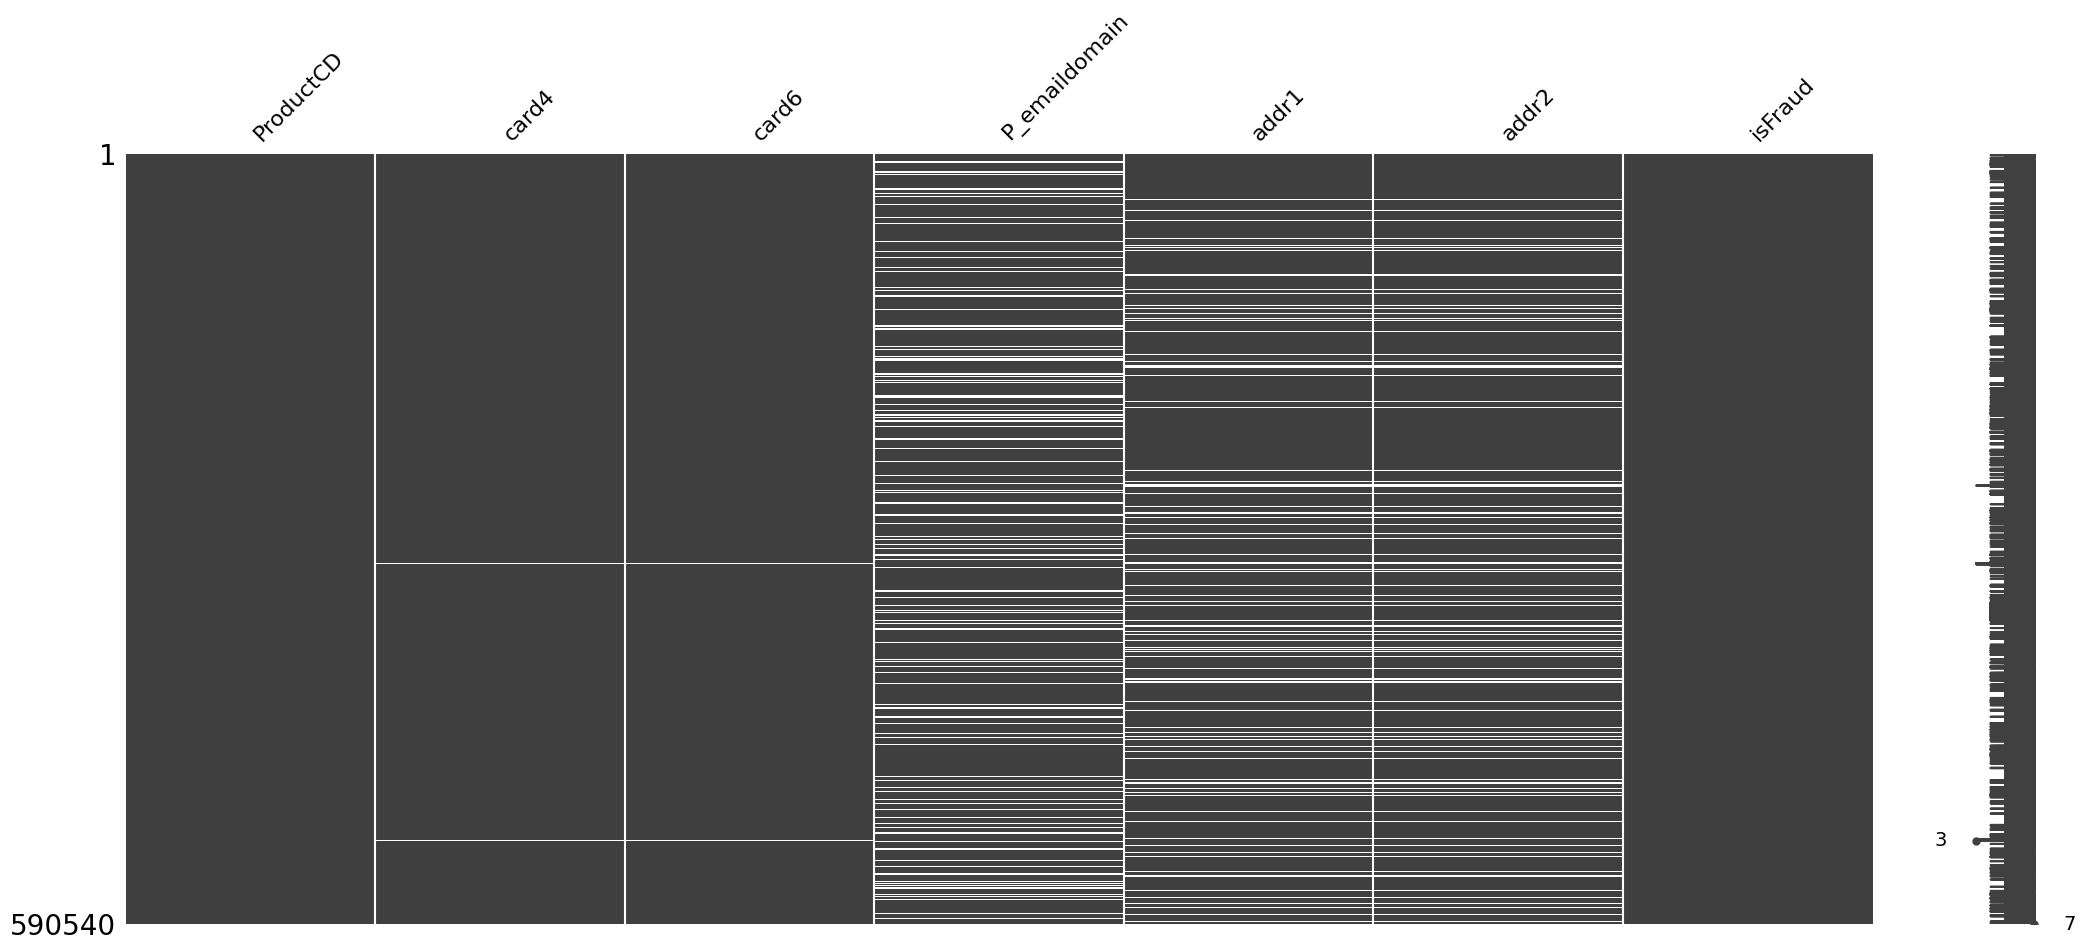

In [35]:
msno.matrix(train_tx[entity_cols+ ['isFraud']])

In [37]:
print(train_tx['TransactionDT'].min(), "-> earliest")
print(train_tx['TransactionDT'].max(), "-> latest")
print("Total span:", train_tx['TransactionDT'].max()/86400, "days")

86400 -> earliest
15811131 -> latest
Total span: 182.99920138888888 days


In [38]:
print(f"Total frauds: {train_tx['isFraud'].sum()}")

Total frauds: 20663


In [41]:
print("dist1:", train_tx['dist1'].describe())
print("dist2:", train_tx['dist2'].describe())
print("\nHigh dist1 → higher fraud?")
high_dist1 = train_tx['dist1'] > train_tx['dist1'].quantile(0.95)
print("Top 5% dist1 fraud rate:", train_tx.loc[high_dist1, 'isFraud'].mean())


dist1: count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64
dist2: count    37627.000000
mean       231.855423
std        529.053494
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64

High dist1 → higher fraud?
Top 5% dist1 fraud rate: 0.032724825439555814
